In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats

# The basics

In [ ]:
# For the basics
#print(sns.get_dataset_names())
df = sns.load_dataset("car_crashes")

v = df.ins_premium.pct_change().dropna(axis=0,how="any")*100
pop = np.array(v)
sample = np.array(v.sample(30, random_state = 27))

## Measures of central tendency

In [ ]:
# Mean
print(f"Mean, sample: {pop.mean()} pop: {sample.mean()}")

# Median
print(f"Median, sample: {np.median(pop)} pop: {np.median(sample)}")

# Variance
print(f"Variance, sample: {np.var(pop)} pop: {np.var(sample,ddof=1)}")

# Standard deviation
print(f"Variance, sample: {np.std(pop)} pop: {np.std(sample,ddof=1)}")

## Outliers

It is common to a fence for outliers which is the
boundary from which a data point can be
considered an outlier or not

Best practise about fences is to put them
1.5 times the width of the IQR

In [97]:
qt = lambda x: np.quantile(pop, q = x) # y.quantile(.25) if y is dataSeries

# IQR
iqr = qt(0.75) - qt(0.25)
min_fence = qt(0.25) - (iqr*1.5)
max_fence = qt(0.75) + (iqr * 1.5)

In [100]:
pop_no_outliers = [i for i in pop if min_fence <= i <= max_fence]

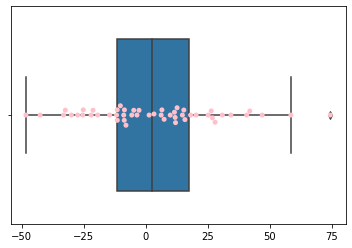

In [99]:
plt.figure(figsize=(6,4))
sns.boxplot(x=pop,width=0.7)
plt.xticks(range(-100,401,25))

sns.swarmplot(x=pop,color="pink")

plt.show()

## Correlations

In [ ]:
# For plotting of correlations
import yfinance as yf

sp500 = yf.download(tickers="SPY",start = "2020-01-01",interval="1wk")["Close"].dropna()
btc = yf.download(tickers="BTC-USD",start = "2020-01-01",interval="1wk")["Close"].dropna()
gold = yf.download(tickers="GLD",start = "2020-01-01",interval="1wk")["Close"].dropna()

0.8471503359875293


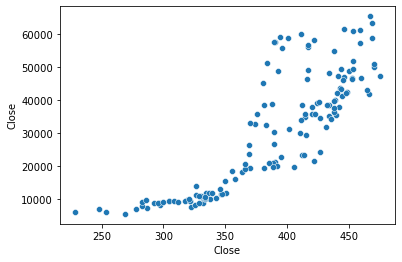

In [110]:
sns.scatterplot(x=sp500,y=btc)
print(sp500.corr(btc))

0.19149936567168133


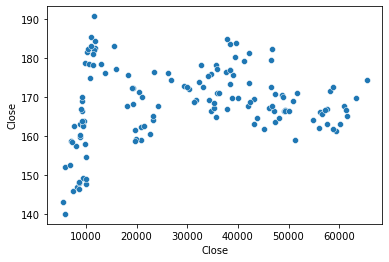

In [112]:
sns.scatterplot(x=btc,y=gold)
print(btc.corr(gold))

## Plotting

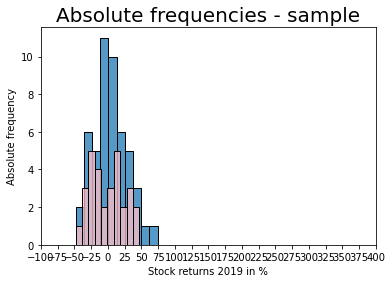

In [79]:
plt.figure(figsize=(6,4))

sns.histplot(pop,bins=10)
sns.histplot(sample,bins=10,color="pink")

plt.title("Absolute frequencies - sample",fontsize = 20)
plt.xlabel("Stock returns 2019 in %")
plt.ylabel("Absolute frequency")
plt.xticks(range(-100,401,25))
plt.show()

# T-test

Read more about t-tests [here](https://www.statisticshowto.com/probability-and-statistics/t-test/).

## Checklist for guidance

You can use this checklist as guidance. You don't necessarily have to follow every step and also, following every step is not necessarily sufficient. Rather, look at this checklist as a helpful resource. Ultimately you are resonsible for conducting your analysis in the ways you see fit. 

- Make a clear description of the population(s) (and the population mean, given that it is known) 
- Make a clear description of your sample(s)
- Generate H0 and H1
- Decide which ttest is the most appropriate
- Decide if you have a two-sided or 1-sided hypothesis and if 1-sided decide the direction
    - If two samples: decide if related or independent
- Decide alpha-level / level of significance
- Prepare sample data
- Import the function for your chosen ttest from scipy
- Run the ttest with your data
    - Specify parameters correctly in the ttest (if necessary)
- Evaluate the result i.e. Keep or reject your H0/H1

**Note:** Most common significanse (alpha) levels are 1%, 5% and 10%. 5% is usually a good choice.

## Hypotheses formulation

A difference:
- $H_0: \mu_1 = \mu_2 \longrightarrow there \ is \ \underline{no} \ difference \ between \ the \ groups$
- $H_1: \mu_1 \ne \mu_2 \longrightarrow there \ is \ \underline{a} \ difference \ between \ the \ groups \$

Greater than:
- $H_0: \mu_1 \le \mu_2$
- $H_1: \mu_1 > \mu_2$


Less than: 
- $H_0: \mu_1 \ge \mu_2$
- $H_1: \mu_1 < \mu_2$

## Type of T-test

- **One-sample T-test**

    Example: We want to test if students on average have coded the promised 400 hours of code during the 10 Bootcamp weeks by taking a sample of Alumnis. 400 is our reference point why we only need one sample.


- **Independent two-sample T-test**

    When we want to check is the mean scores for two independent, separate samples have a statistically significant difference.

    Example: We want to compare the mean english test scores for one sample taken from Sweden and one from Denmark.


- **Dependent, paired-sample T-test**

    When we have dependent samples, could be one sample tested several times and also two samples that are matched/paired.
    
    Example: We want to see if students attending the course have improved their coding skills (that is measurable) after the Bootcamp.

## Data import and quality check

In [137]:
# For T-test
#print(sns.get_dataset_names())
df2 = sns.load_dataset("titanic")

In [138]:
x1 = df2.loc[df2.sex == "male","fare"]
x2 = df2.loc[df2.sex == "female","fare"]

In [170]:
any(df2.duplicated())

True

In [171]:
any(df2.loc[:,["sex","fare"]].notna())

True

## With Scipy 

https://docs.scipy.org/doc/scipy/reference/stats.mstats.html#statistical-tests

### One-sample T-test

In [155]:
stats.ttest_1samp(x1, 25.6)

Ttest_1sampResult(statistic=-0.042378686902158, pvalue=0.9662115043450487)

### Independent two-sample T-test + choice of alt. hypotheses

In [151]:
df2.groupby("sex")["fare"].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [175]:
# Paired/Dependent 2-sample t-test with alpha = 0,05
res = stats.ttest_ind(x1,x2,alternative="less") # less two-sided greater
if res.pvalue < 0.05:
    print("We reject H0 in favor of H1")
else:
    print("We keep H0")
res

We reject H0 in favor of H1


Ttest_indResult(statistic=-5.529140269385719, pvalue=2.1154339350214998e-08)

In [157]:
# Alternative hypotheses = ‘two-sided’: the means of the distributions underlying the samples are unequal.
stats.ttest_ind(x1,x2) 
stats.ttest_ind(x1,x2,alternative="two-sided")

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

In [158]:
# Alternative hypotheses = ‘greater’: the mean of the distribution underlying the first sample is 
# greater than the mean of the distribution underlying the second sample.
stats.ttest_ind(x1,x2,alternative="greater")

Ttest_indResult(statistic=-5.529140269385719, pvalue=0.9999999788456607)

In [218]:
# Alternative hypotheses = ‘less’: the mean of the distribution underlying the first sample is less 
# than the mean of the distribution underlying the second sample.
stats.ttest_ind(x1,x2,alternative="less")

Ttest_indResult(statistic=-5.529140269385719, pvalue=2.1154339350214998e-08)

### Dependent, paired-sample T-test

In [ ]:
stats.ttest_rel(a, b)

## Independent t-test | calculated from formula


- The test statistic for an independent t-test can be calculated using the following formula:

$$t = \frac{(\bar{x}_1 - \bar{x}_2)}{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

- Where $S_p$ is the pooled standard deviation and is calculated as:

$$s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$$

Look up critical t-value in a [t-table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)
- $two-sided \  hypothesis$
- $df = n1+n2-2 = 889$
- $\alpha = 0.05$

In [223]:
n1 = len(x1)
n2 = len(x2)
x1m = x1.mean()
x2m = x2.mean()
s1 = x1.var()
s2 = x2.var()

In [224]:
n1+n2-2

889

In [225]:
crit_t = 1.984 # From t-table

In [229]:
t_fh = (x1m-x2m)/np.sqrt(((n1-1)*s1+(n2-1)*s2)/(n1+n2-2))/np.sqrt((1/n1)+(1/n2))
t_fh

-5.529140269385718

# Bayers_statistics

- Probability of an event IF! one (or more) event(s) already have occurred
    - Real world examples...
        - Probability of package being faulty IF machine identifies it as faulty
        - Probability of people laughing at this joke given/IF I know what they have laughed at earlier
<br>
<br>
<br>
$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$


- P(A|B) = Probability of A given B
- P(A) = Probability of A = P(A|B) + P(A|-B)
- P(B) = Probability of B = P(A|B) + P(-A|B)


- Machine recall (sensitivity) = 99% = P(B|A)
- Machine specificity = 99% = P(-B|-A)

## Data import and quality check

In [239]:
import os

cwd = os.getcwd()
filp = os.curdir + "/data/" + "experiment_data.csv" 
exp = pd.read_csv(filp)

## Beta distribution

Beta(a = Successes, b = Failures)

In [233]:
prior1_1 = np.random.beta(1,1,1000) # Agnostic beta
prior10_10 = np.random.beta(10,10,1000) # Weak beta
prior100_100 = np.random.beta(100,100,1000) # Strong beta

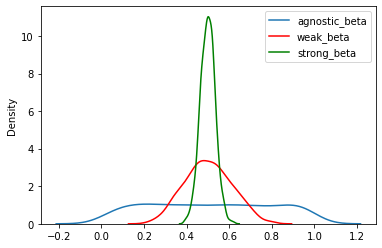

In [234]:
sns.kdeplot(prior1_1,label="agnostic_beta")
sns.kdeplot(prior10_10, color="red",label="weak_beta")
sns.kdeplot(prior100_100,color="green",label="strong_beta")
plt.legend()
plt.show()

## Simulating A/B test

In [242]:
control = exp.loc[exp.group == "control"]
con_t = control.converted.sum()
con_f = len(control)-con_t
alt = exp.loc[exp.group == "treatment"]
alt_t = alt.converted.sum()
alt_f = len(alt)-alt_t

### Posterior distribution

In [273]:
# With an agnostic beta prior = beta(1,1)
pa = 1 # Prior alpha
pb = 1 # Prior beta

# Posterior
control_post = np.random.beta(pa+con_t,pb+con_f,10000)
alt_post = np.random.beta(pa+alt_t,pb+alt_f,10000)

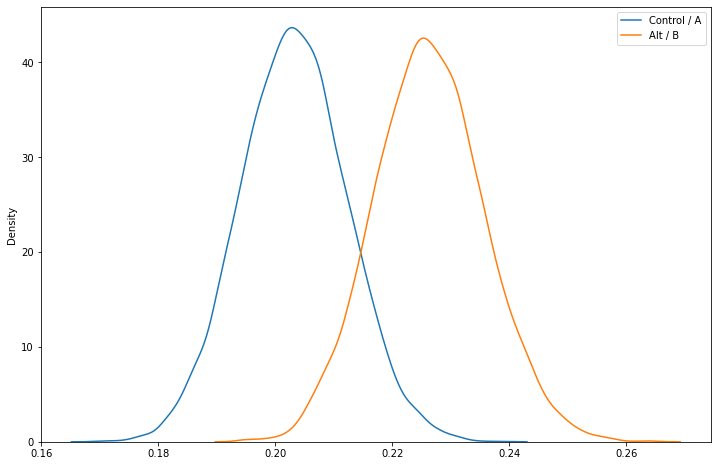

In [274]:
plt.figure(figsize=(12,8))

sns.kdeplot(control_post,label="Control / A")
sns.kdeplot(alt_post,label="Alt / B")

plt.legend()
plt.show()

### P-value approximation simple

In [275]:
diff = alt_post-control_post

# Check each item in the array, the alt should be better than the posterior in 95% of cases to be adopted
(diff > 0).mean()

0.9616

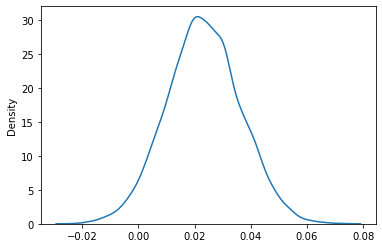

In [276]:
sns.kdeplot(diff)
plt.show()